## Importing the modules and doing the exploratory analytic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
from scipy.stats import normaltest

In [2]:
df = pd.read_csv('Datasets/aug_train.csv')

In [3]:
df.shape

(19158, 14)

In [4]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
#describes the non-numerics data
df.describe(include=object)

,city,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job
count,19158,14650,19158,18772,18698,16345,19093,13220,13018,18735
unique,123,3,2,3,5,6,22,8,6,6
top,city_103,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1
freq,4355,13221,13792,13817,11598,14492,3286,3083,9817,8040


In [7]:
#describes the numerics data
df.describe().drop(columns=['enrollee_id','target'])

,city_development_index,training_hours
count,19158.000000,19158.000000
mean,0.828848,65.366896
std,0.123362,60.058462
min,0.448000,1.000000
25%,0.740000,23.000000
50%,0.903000,47.000000
75%,0.920000,88.000000
max,0.949000,336.000000


## Data vizualization

In [8]:
list(df.columns.values)[3:12]

['gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job']

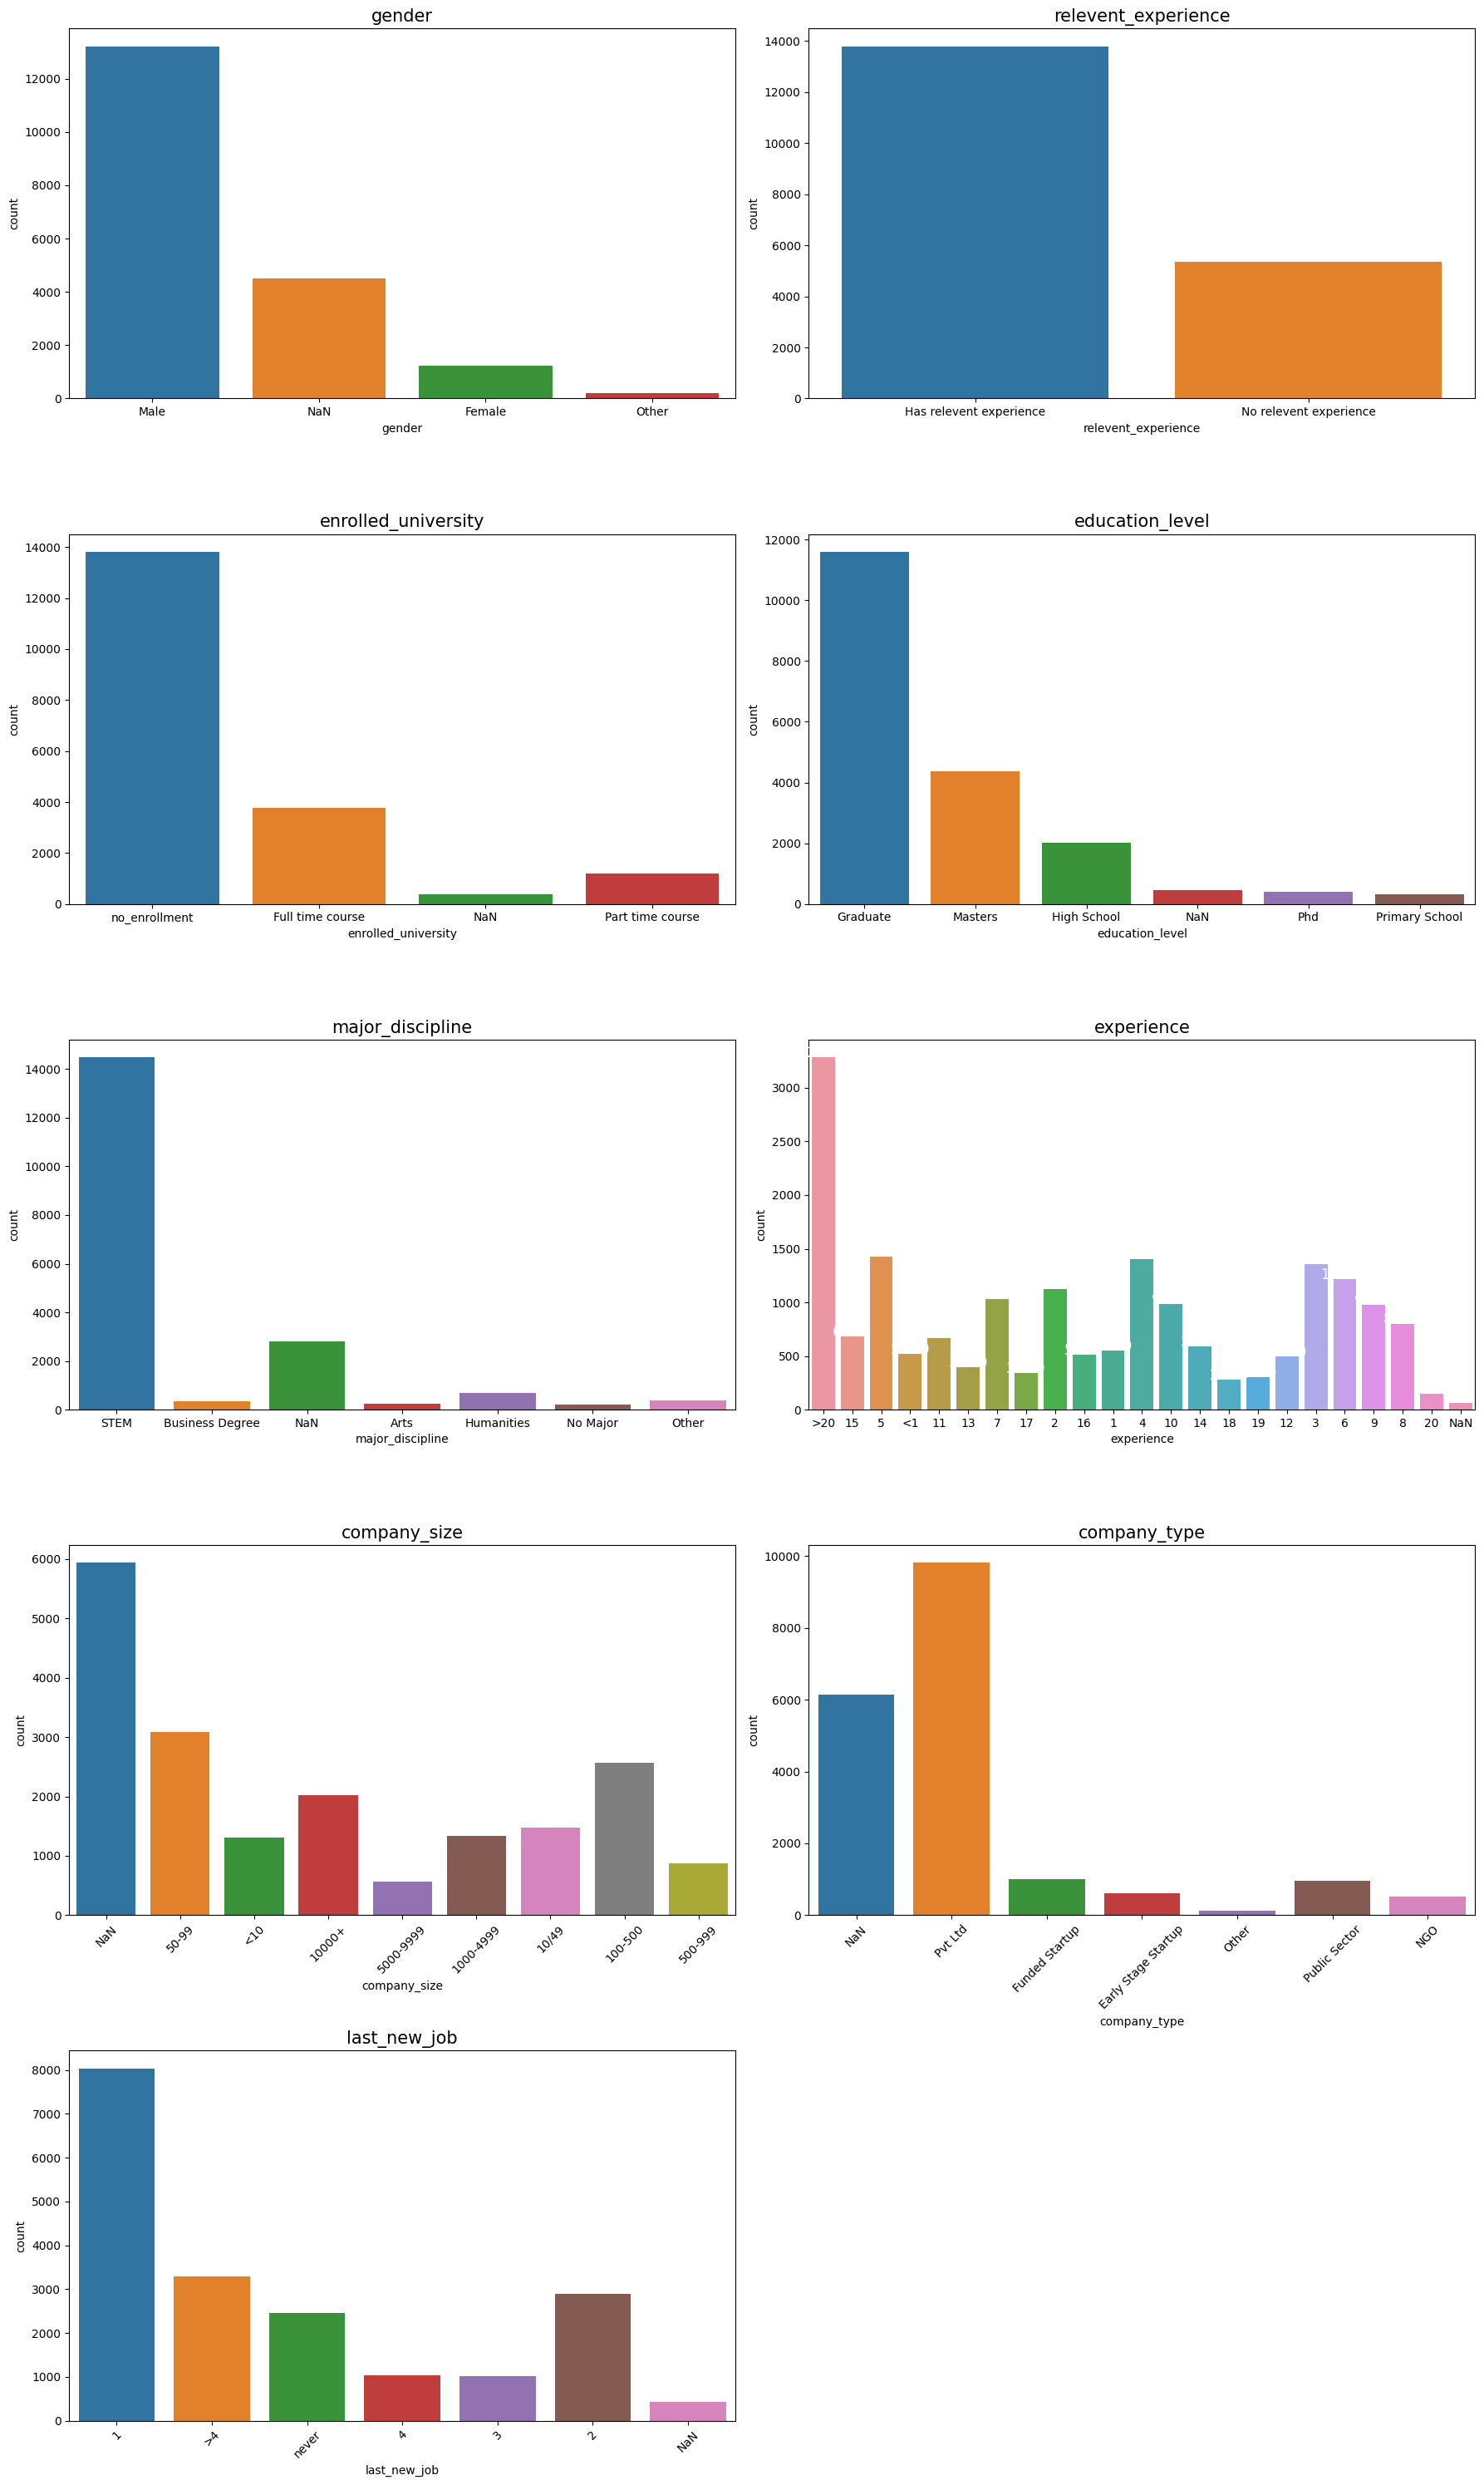

In [9]:
plt.figure(figsize=[18,30])
column_list = list(df.columns.values)[3:12]

A = 0

for i in column_list:
    A+=1
    plt.subplot(5,2,A)
    ax = sns.countplot(data=df.fillna('NaN'),x=i)
    plt.title(i,fontsize = 15)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}',(p.get_x()+0.4,p.get_height()), ha = 'center', color='white', size = 12)
    if A >= 7:
        plt.xticks(rotation = 45)
plt.tight_layout(h_pad = 2)

## Verifying the numeric variables distribution

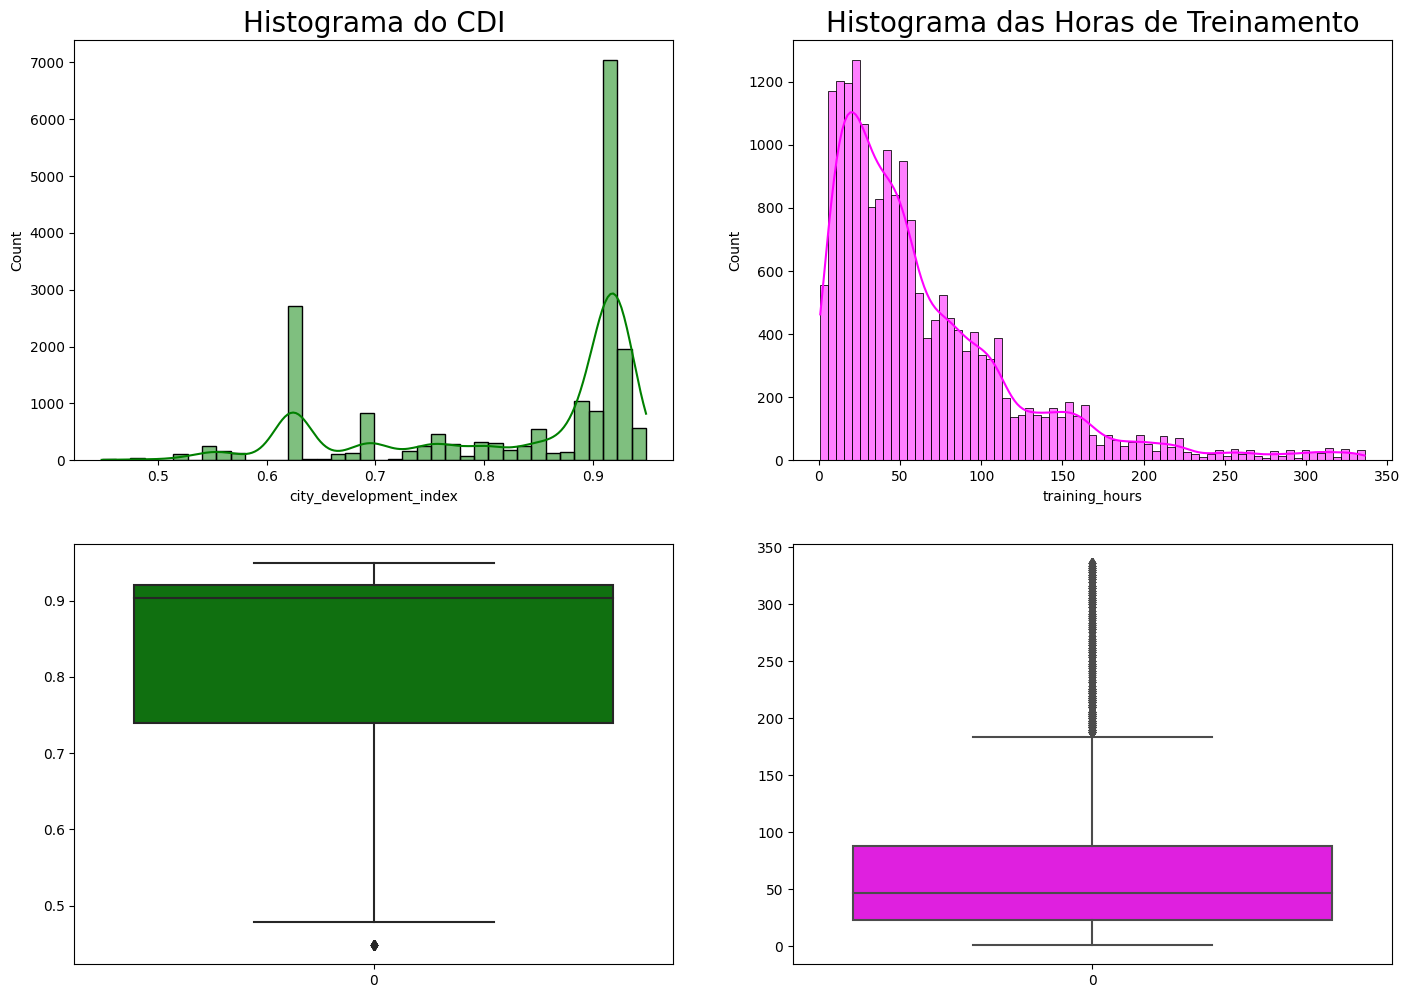

In [10]:
plt.figure(figsize = (17,12))

plt.subplot(221)
sns.color_palette('hls' , 8)
sns.histplot(df['city_development_index'],kde = True, color = 'green')
plt.title('Histograma do CDI', fontsize = 20)


plt.subplot(222)
sns.histplot(df['training_hours'], kde=True, color = 'magenta')
plt.title('Histograma das Horas de Treinamento', fontsize = 20)

plt.subplot(223)
sns.boxplot(df['city_development_index'],color = 'green')

plt.subplot(224)
sns.boxplot(df['training_hours'],color = 'magenta')

plt.show()

## Testing the normality of the numerics variables

In [3]:
numerical_feature = ['city_development_index','training_hours']
for i in numerical_feature:
    stats,pval = normaltest(df[i])
    if pval > 0.05:
        print(i,'normal distribution')
    else:
        print(i,'not normal distribution')

city_development_index not normal distribution
training_hours not normal distribution
